<a href="https://colab.research.google.com/github/Javlonbek-Math/ML-DL_projects/blob/main/Diabet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***`This dataset collected the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements. All patients in the dataset are women at least 21 years old.`***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###***`Step: Learning and analysing data`***

In [ ]:
df.shape

(768, 9)

In [5]:
df['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
73,1
171,1
255,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [7]:
df=df.drop(index=df[df['Outcome']==0].iloc[:200].index)
df.Outcome.value_counts()

,count
Outcome,
0,300
1,268


####***`as we see, there is an unbalanced outcome, we need rebalance by droping some data`***####

###***`Analyzing the Correlation`***

In [8]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.493950
BMI,0.303621
Pregnancies,0.236914
Age,0.235373
DiabetesPedigreeFunction,0.160386
Insulin,0.136308
SkinThickness,0.079881
BloodPressure,0.069328


###***`Step: Data Preparation for Machine learning`***

In [9]:
df=df.drop(['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'],axis=1) #  we removed the columns "BloodPressure" "SkinThickness""Insulin""DiabetesPedigreeFunction" as they have very low correlation


In [10]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [11]:
df.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
2,8,183,23.3,32,1
4,0,137,43.1,33,1
6,3,78,31.0,26,1
8,2,197,30.5,53,1


###***`Apply Standardization`***

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

###***`Train_Test_set`***

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###***`Machine Learning Model`***

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=11)
knn_model=knn_classifier.fit(X_train,y_train)

In [37]:
y_predict=knn_classifier.predict(X_test)

###***`Jaccard indexing evaluation`***

In [38]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predict)

0.6323529411764706

###***`Selecting the best k`***

In [41]:
from sklearn.model_selection import GridSearchCV
knn_gscv=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,25)}
knn_gscv=GridSearchCV(knn_gscv,param_grid,cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [42]:
knn_gscv.best_params_

{'n_neighbors': 11}

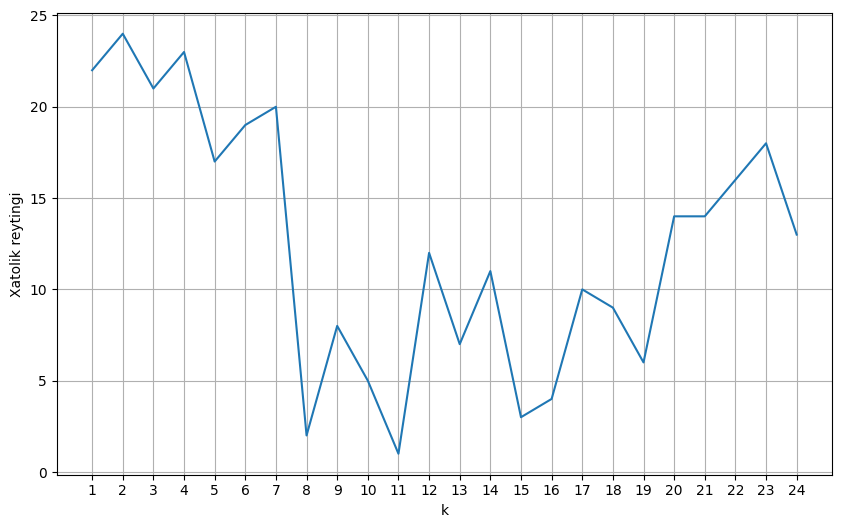

In [47]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

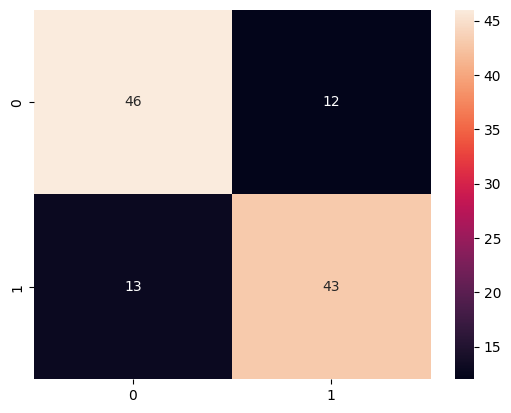

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        58
           1       0.78      0.77      0.77        56

    accuracy                           0.78       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.78      0.78      0.78       114

